In [1]:
import numpy as np
import pandas as pd
import os
from skimage import io,transform


In [2]:
def preprocess(img):
    # Normalize the image in 0-255 range and make it 3-plane
    if len(img.shape)==2:
        img_gray = np.float32(img)
    else:
        img_gray = np.float32(img[:,:,0])
        
    img_gray -= np.amin(img_gray)
    img_gray /= np.amax(img_gray)
    img_gray = np.uint8(255*img_gray)   
    img = np.stack((img_gray,img_gray,img_gray),axis=2)
    
    # Crop
    sumrows = np.sum(img_gray,0)
    sumrows2 = 0*sumrows
    sumrows2[:-1] = sumrows[1:]
    sumcols = np.sum(img_gray,1)
    sumcols2 = 0*sumcols
    sumcols2[:-1] = sumcols[1:]
    diffcols = sumrows2-sumrows
    diffrows = sumcols2-sumcols
    #fig2 = plt.figure(figsize=[8,8])
    #plt.plot(diffcols)
    #fig3 = plt.figure(figsize=[8,8])
    #plt.plot(diffrows)
    #print(diffcols[112])
    boundaries = [0,0,img_gray.shape[0]-1,img_gray.shape[1]-1]
    # Top margin
    for row in range(len(diffrows)):  
        if diffrows[row] > 1000:
            break
        else:
            boundaries[0] = row

    #Bottom margin        
    for row in range(len(diffrows)-2,0,-1):
        if diffrows[row] > 1000:
            break
        else:
            boundaries[2] = row

    # Left Margin
    for col in range(len(diffcols)):
        if diffcols[col] > 1000:
            break
        else:
            boundaries[1] = col

    #Right Margin        
    for col in range(len(diffcols)-2,0,-1):
        if diffcols[col] > 1000:
            break
        else:
            boundaries[3] = col
    #print(boundaries)
    img = img[boundaries[0]:boundaries[2],boundaries[1]:boundaries[3],:]
    
    # Resize
    img = transform.resize(img,(512,512))
    img = np.uint8(255*img)   
    return img


In [3]:
folder = r'C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih'
metaDataFileName = folder + r'\Data_Entry_2017.csv'
trainFileName = folder + r'\train_val_list.txt'


In [4]:
inFolder = os.listdir(folder)
allFileList = {}
for item in inFolder:
    if item.startswith('images_0'):
        path = folder + '\\' + item + r'\images'
        print(path)
        folderFileList = os.listdir(path)
        for file in folderFileList:
            allFileList[file] = path + '\\' + file
print(len(allFileList))
count = 0
for item in allFileList:
    print(item + ' lives at ' + allFileList[item])
    count += 1
    if count==10:
        break
        

C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_001\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_002\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_003\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_004\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_005\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_006\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_007\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_008\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_009\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_010\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_011\images
C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_012\images
112120
00000001_000.png lives at C:\Users\arung\OneDrive\Desktop\COVID 19 Chest Xray\nih\images_001\images\00000

In [6]:
metadata = pd.read_csv(metaDataFileName)
#metadata.head()
normal = metadata['Image Index'][metadata['Finding Labels']=='No Finding']
other = metadata[metadata['Finding Labels']!='No Finding']
pneumonia =  other['Image Index'][other['Finding Labels']=='Pneumonia']
other = other['Image Index'][other['Finding Labels']!='Pneumonia']


normal = normal.to_numpy()
other = other.to_numpy()
pneumonia = pneumonia.to_numpy()

print(normal.shape)
print(other.shape)
print(pneumonia.shape)


(60361,)
(51437,)
(322,)


In [7]:
index = []
infile = open(trainFileName,'r')
outfile_n = open(folder + r'\normaltrainfiles.txt','w')
outfile_o = open(folder + r'\othertrainfiles.txt','w')
outfile_p = open(folder + r'\pneumoniatrainfiles.txt','w')
allText = infile.read()
names = allText.split('\n')
count_n = 0
count_o = 0
count_p = 0
for name in names:
    print('\r'+str(count_n+count_o+count_p+1)+' of '+str(len(names)), end='')
    if name in normal:
        outfile_n.write(allFileList[name] + '\n')
        count_n += 1
    elif name in other:
        outfile_o.write(allFileList[name] + '\n')
        count_o += 1
    else:
        outfile_p.write(allFileList[name] + '\n')
        count_p += 1
print()
print('Normal:',count_n)
print('Other Disease:',count_o)
print('Pneumonia:',count_p)

infile.close()
outfile_n.close()
outfile_o.close()
outfile_p.close()

86524 of 86524
Normal: 50500
Other Disease: 35790
Pneumonia: 234


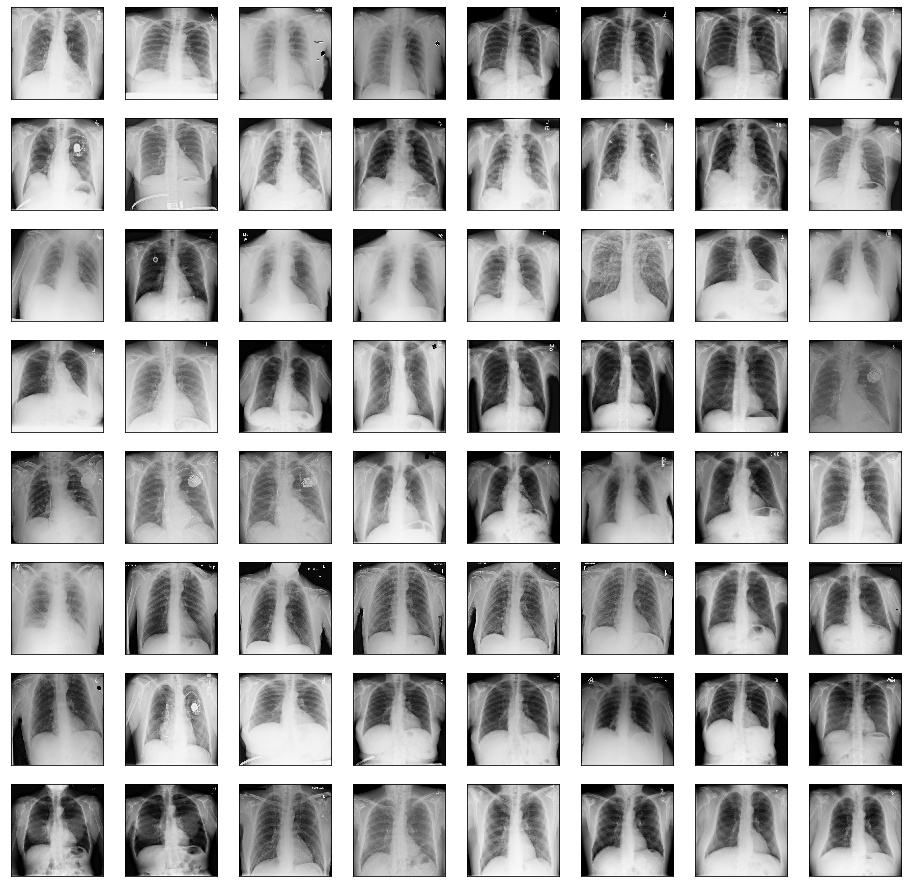

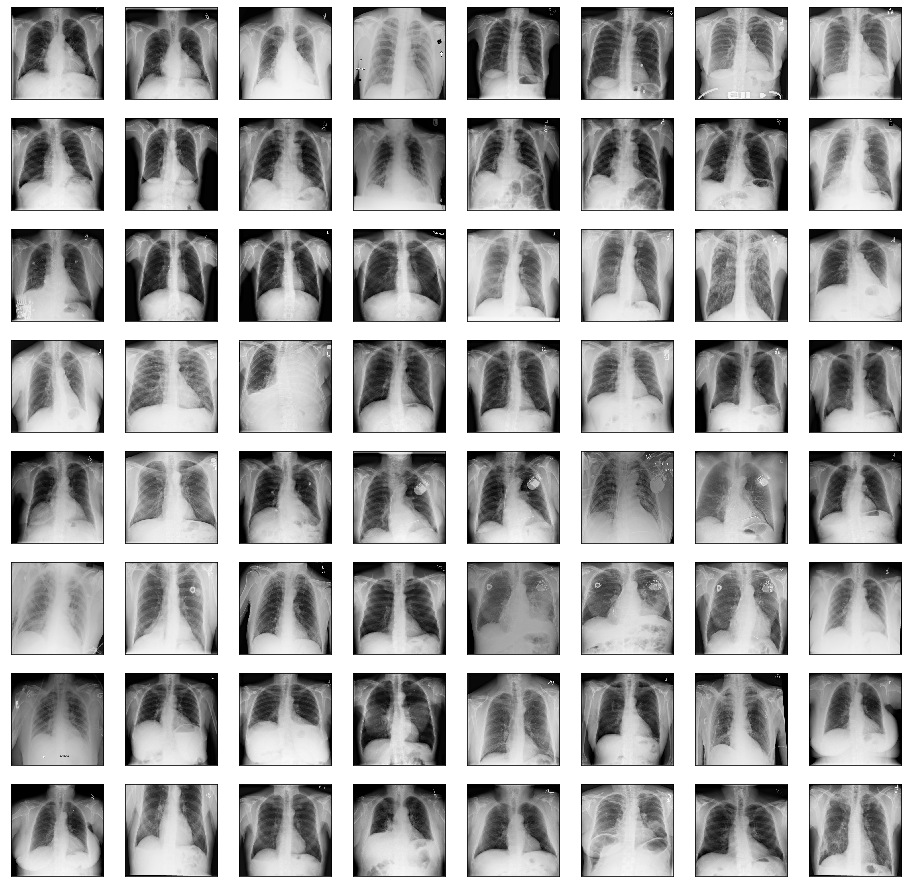

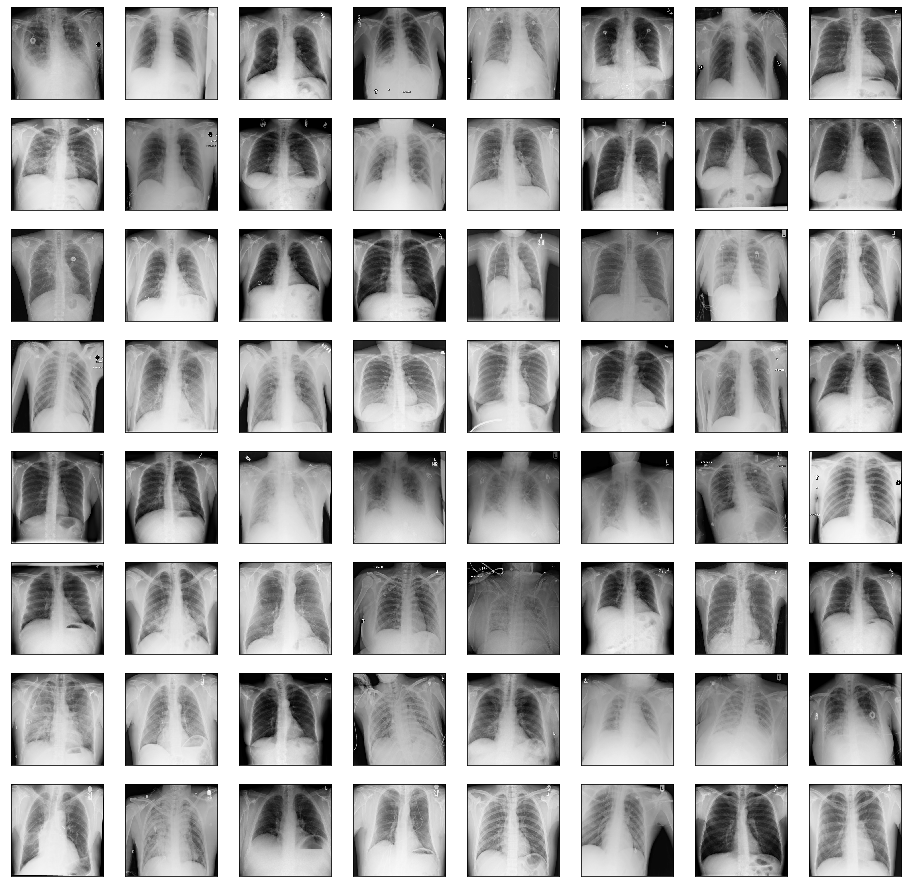

In [8]:
import matplotlib.pyplot as plt

nfile = open(folder + r'\normaltrainfiles.txt','r')
ofile = open(folder + r'\othertrainfiles.txt','r')
pfile = open(folder + r'\pneumoniatrainfiles.txt','r')


fig = plt.figure(figsize=[16,16])
count = 0
filename = 'something'
while(filename):
    filename = nfile.readline().split('\n')[0]
    img = preprocess(plt.imread(filename))
    count+=1
    plt.subplot(8,8,count)
    plt.imshow(img,'gray')
    plt.xticks([])
    plt.yticks([])
    if count==64:
        break
plt.show()

fig2 = plt.figure(figsize=[16,16])
count = 0
filename = 'something'
while(filename):
    filename = ofile.readline().split('\n')[0]
    img = preprocess(plt.imread(filename))
    count+=1
    plt.subplot(8,8,count)
    plt.imshow(img,'gray')
    plt.xticks([])
    plt.yticks([])
    if count==64:
        break
plt.show()

fig2 = plt.figure(figsize=[16,16])
count = 0
filename = 'something'
while(filename):
    filename = pfile.readline().split('\n')[0]
    img = preprocess(plt.imread(filename))
    count+=1
    plt.subplot(8,8,count)
    plt.imshow(img,'gray')
    plt.xticks([])
    plt.yticks([])
    if count==64:
        break
plt.show()


nfile.close()
ofile.close()
pfile.close()